## Very short script to test U10 mods (where U10 is now output as the resolved wind, and a new variable is the version with Gusts added.

In [2]:
# Load libraries

# # Plotting utils 
import datetime
import glob
import os
import pickle
import time
import warnings
from datetime import date, timedelta
import Ngl
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util
from cartopy.util import add_cyclic_point
import matplotlib as matplotlib
import matplotlib.animation as animation
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import metpy.calc as mpc
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import xarray as xr
from matplotlib.dates import DateFormatter
from metpy.units import units
from metpy import interpolate
from metpy.calc import vertical_velocity
from mpl_toolkits.axes_grid1 import make_axes_locatable

warnings.filterwarnings('ignore')


In [5]:
caseDir = '/glade/derecho/scratch/mdfowler/archive/FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cesm2_3_alpha17b_gustsON_noFix_fixU10output_try2.deubgV2_addCAM.002/atm/hist/'

h1_DS = xr.open_dataset(caseDir+'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cesm2_3_alpha17b_gustsON_noFix_fixU10output_try2.deubgV2_addCAM.002.cam.h1a.0001-01-02-00000.nc', decode_times=True)
h2_DS = xr.open_dataset(caseDir+'FLT2000_prelim.ne30pg3_ne30pg3_mg17.TestGustGlobal_cesm2_3_alpha17b_gustsON_noFix_fixU10output_try2.deubgV2_addCAM.002.cam.h2a.0001-01-01-10800.nc', decode_times=True)


In [20]:
h1_DS.time.values

array([cftime.DatetimeNoLeap(1, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 5, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [8]:
u10res = h1_DS.U10

In [7]:
u10Gust = h1_DS.U10WITHGUSTS

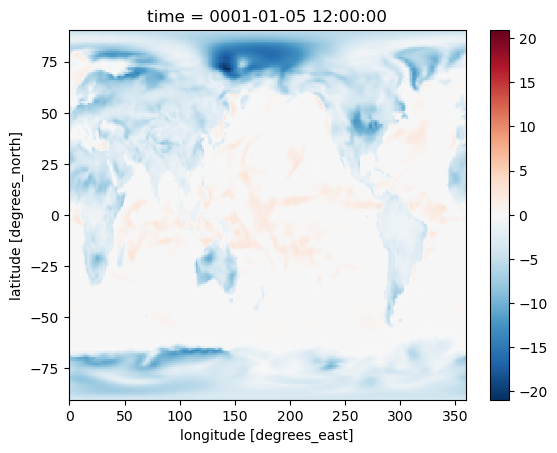

In [11]:
(u10Gust-u10res).isel(time=4).plot.pcolormesh()


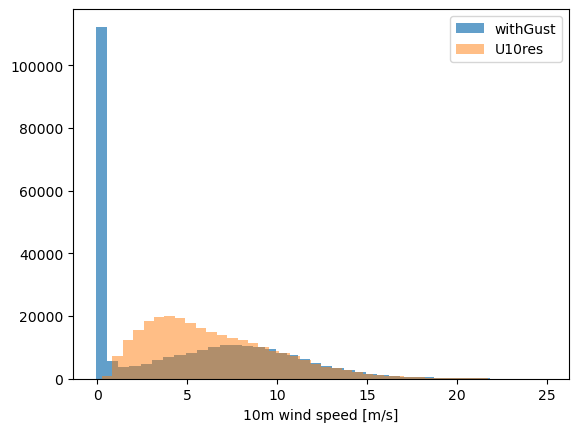

In [19]:
u10Gust.plot.hist(alpha=0.7, label='withGust',bins=40)
u10res.plot.hist(alpha=0.5, label='U10res',bins=40)
plt.legend()

**Conclusion:** Okay, it probably makes sense this way; over *land*, the U10WITHGUST shouldn't even exist because it's computed only for ocean grid points. 